## Mempersipakan data dan library yang digunakan

In [ ]:
# import library yang diperlukan
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')

# melihat file directori ada/tidak
if os.path.isfile(directory):
  print('File ditemukan') 

File ditemukan


In [ ]:
# melihat isi bagian awal dari dataset
dataset = pd.read_csv(directory)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# melihat informasi dari data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# melihat informasi statik deskriptif dataset
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Assignments 5

1. Visualisasikan korelasi feature median_house_value dengan `total_rooms`, `housing_median_age`, dan `households` menggunakan scatter plot.

2. Lakukan training dengan komposisi berikut:
  * 90% training data & 10% testing
  * 85% training data & 15% testing

  Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

  Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.

3. Gunakan SVR (SVM Regression) (from sklearn.svm import SVR) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan LinearRegression. Komposisi training & testing: 80:20. Tariklah kesimpulan yang didapat.

Hint: Cek https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

# Jawaban No. 1

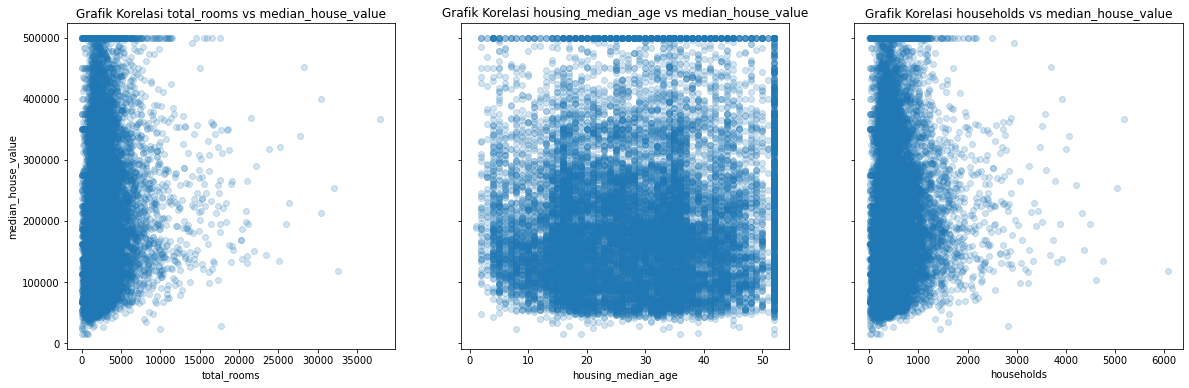

In [ ]:
# memvisualisasikan dat feature total_rooms, housing_median_ange dan households terhadap median_house_value dengan scatter plot

# menerapkan 3 grafik dalam satu baris
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))
ax[0].scatter(x=dataset['total_rooms'], y=dataset['median_house_value'], alpha=0.2)
ax[1].scatter(x=dataset['housing_median_age'], y=dataset['median_house_value'], alpha=0.2)
ax[2].scatter(x=dataset['households'], y=dataset['median_house_value'], alpha=0.2)

# memberikan judul pada masing-masing grafik
ax[0].set_title('Grafik Korelasi total_rooms vs median_house_value')
ax[1].set_title('Grafik Korelasi housing_median_age vs median_house_value')
ax[2].set_title('Grafik Korelasi households vs median_house_value')

# memberikan nama label pada grafik
ax[0].set_xlabel('total_rooms')
ax[1].set_xlabel('housing_median_age')
ax[2].set_xlabel('households')
ax[0].set_ylabel('median_house_value')

plt.show()

# Jawaban No. 2

## Training dengan 90% training dan 10% testing

In [ ]:
# membagi data feature dan label
feature = dataset.drop(['median_house_value'], axis=1)
label = dataset['median_house_value']

In [ ]:
# melakukan scalling pada feature dan label
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
# memisahkan data training 90% dan testing 10%
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.1)

In [ ]:
# melakukan training data dengan algoritma Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train, label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# melihat hasil nilai r2_score dari dara train dan test set
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(forest_reg.predict(feature_train), label_train)
r2_test = r2_score(forest_reg.predict(feature_test), label_test)

print('Nilai r2 score train \t: ', r2_train)
print('Nilai r2 score test \t: ', r2_test)

Nilai r2 score train 	:  0.9721200640630706
Nilai r2 score test 	:  0.7803214114743551


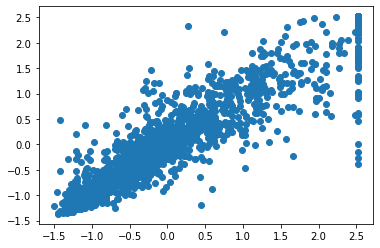

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)
plt.show()

## Training dengan 85% training dan 15% testing

In [ ]:
# memisahkan data training 85% dan testing 15%
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.15)

In [ ]:
# melakukan training data dengan algoritma Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train, label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# melihat hasil nilai r2_score dari dara train dan test set
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(forest_reg.predict(feature_train), label_train)
r2_test = r2_score(forest_reg.predict(feature_test), label_test)

print('Nilai r2 score train \t: ', r2_train)
print('Nilai r2 score test \t: ', r2_test)

Nilai r2 score train 	:  0.9720114256231599
Nilai r2 score test 	:  0.7831790173886533


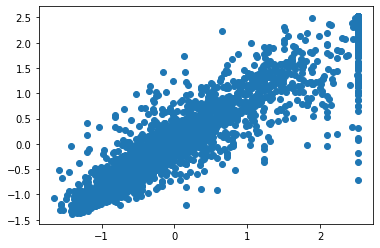

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)
plt.show()

### Kesimpulan:
- Semakin kecil dat test yang digunakan dan data training lebih banyak maka nilai r2_score pada data testing semakin meningkat yang berarti komputer semakin banyak belajar dari data training yang banyak sehingga meningkatkan nilai r2_score pada data testing.
- Secara keseluruhan perbedaan nilai r2_score baik pada dataset testing 20%, 15%, dan 10% tidak terlalu berbeda secara signifikan dengan hasil lumayan bagus yang berkisar 0.75 - 0.80.
- Dari hasil grafik scatternya dapat disimpulkan hasil prediksi (r2_score test = 0.75-0.80) hampir mendekati hasil ekpektasi (r2_score train = 0.97) dapat diartikan bahwa kondisi data lumayan bagus (good).

# Jawaban No. 3

## Metode Regression SVR

In [ ]:
# memisahkan data training 80% dan testing 20%
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2)

In [ ]:
# melakukan training data dengan algoritma SVR dengan kernel 'linear'
from sklearn.svm import SVR
sv_reg = SVR(kernel='linear', C=100, gamma='auto')

sv_reg.fit(feature_train, label_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# melihat hasil nilai r2_score dari dara train dan test set
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(sv_reg.predict(feature_train), label_train)
r2_test = r2_score(sv_reg.predict(feature_test), label_test)

print('Nilai r2 score train \t: ', r2_train)
print('Nilai r2 score test \t: ', r2_test)

Nilai r2 score train 	:  0.4343595144104312
Nilai r2 score test 	:  0.39726143114618606


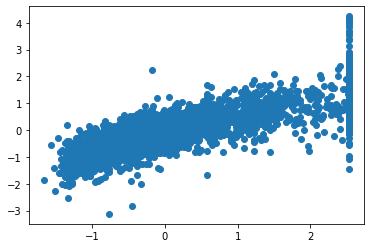

In [ ]:
predictions = sv_reg.predict(feature_test)
plt.scatter(label_test, predictions)
plt.show()

### Kesimpulan:
- Berdasarkan evaluasi yang dilakukan terlihat bahwa model linearRegresion dan SVR (kernel=linear) memiliki nilai r2_score train dan r2_score test yang hampir sama (r2_score train = kisaran 0.44 dan r2_score = kisaran 0.39).
- Dari grafik scatter plot SVR juga terlihat korelasinya kurang diagonal sehingga hubungan korelasinya tidak begitu signifikan / akurasi rendah.
- Dari grafik ini dapat disimpulkan akurasinya (r2_score) underfitting karena baik r2_score train dan r2_score test bernilai dibawah 0.5
- Semakin komplek algoritma model yang digunakan (exp: SVR) belum tentu menghasilkan model yang optimal melainkan harus mempertimbangkan karakteristik kasus yang dihadapi.
- Pada kasus california_housing kemungkinan kedua model, baik model linearRegression dan model SVR dapat dioptimalkan dengan menentukan hyperparameter yang sesuai.
